In [9]:
import torch
import numpy as np
from torch import nn
from torch import optim
from tqdm import trange
from torch.nn import functional as F
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

In [2]:
train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
train_data = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)
test_data = torch.utils.data.DataLoader(test, batch_size=8, shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 128)
        self.l2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.log_softmax(self.l2(x), dim=1)
        return x

In [5]:
EPOCHS = 5
net = Net()
opt = optim.Adam(net.parameters(), lr = 0.001)

for epoch in trange(EPOCHS):
    for data in train_data:
        x, y = data
        opt.zero_grad()
        output = net(x.view(-1, 784))
        loss = F.nll_loss(output, y)
        loss.backward()
        opt.step()
    print(loss)

 20%|██        | 1/5 [00:12<00:48, 12.16s/it]

tensor(0.1189, grad_fn=<NllLossBackward>)


 40%|████      | 2/5 [00:23<00:35, 11.82s/it]

tensor(0.2315, grad_fn=<NllLossBackward>)


 60%|██████    | 3/5 [00:35<00:23, 11.88s/it]

tensor(0.0656, grad_fn=<NllLossBackward>)


 80%|████████  | 4/5 [00:47<00:11, 11.85s/it]

tensor(0.0051, grad_fn=<NllLossBackward>)


100%|██████████| 5/5 [00:59<00:00, 11.89s/it]

tensor(0.0006, grad_fn=<NllLossBackward>)


In [6]:
total = 0
correct = 0

with torch.no_grad():
    for data in test_data:
        x, y = data
        output = net(x.view(-1, 784))
        correct += int(torch.sum(y == torch.argmax(output, axis = 1)))
        total += len(output)

print(f"Accuracy: {correct/total}")

Accuracy: 0.9749


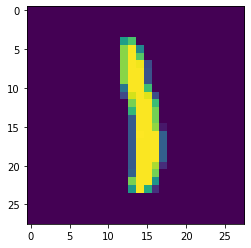

In [12]:
plt.imshow(x[3].view(28, 28))